In [36]:
!pip install neuralprophet==0.9.0
!python --version

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



Python 3.10.13


In [37]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('/kaggle/input/btc-all/4h.csv')
data['ds'] = pd.to_datetime(data['ds'])
data = data[250:]

pd.isna(data).values.any()

False

In [39]:
del data['open']

for i in ['count', 'feeValue', 'inputCount', 'inputValue', 'minedValue', 'outputCount','outputValue','fee_avg', 'btc_dom', 'open_interest', 'volume', 'SPX', 'NDX', 'DXY', 'DJI', 'VIX', 'GOLD']:
    data[i] = np.log2(data[i])

data = data.rename(columns={'SMA50':'y'})
data

,ds,high,low,close,volume,count,feeValue,inputCount,inputValue,minedValue,...,long_short_ratio,funding_rate,sentiment_mean,sentiment_sum,SPX,DXY,DJI,VIX,NDX,GOLD
250,2022-01-11 16:00:00,43118.00,41662.16,42938.55,16.689015,16.050996,1.315892,17.563025,20.061651,7.748123,...,2.564187,0.000100,-0.0228,-8.0560,12.186158,6.581592,15.132759,4.310340,13.932514,10.823236
251,2022-01-11 20:00:00,43080.52,42586.58,42700.68,14.663944,15.626565,1.027517,17.211442,19.998557,7.745093,...,2.560385,0.000100,-0.0228,-8.0560,12.200696,6.579376,15.145376,4.199280,13.949990,10.830741
252,2022-01-12 00:00:00,42949.97,42415.00,42592.92,14.632444,15.048657,0.845440,16.522980,19.069338,6.578136,...,2.556584,-0.000048,0.0820,33.2189,12.202390,6.579256,15.145688,4.196135,13.951498,10.830737
253,2022-01-12 04:00:00,42864.00,42450.00,42550.09,14.566156,15.041702,0.685113,17.200812,19.284839,7.053739,...,2.552782,-0.000048,0.0820,33.2189,12.202390,6.579256,15.145688,4.196135,13.951498,10.828156
254,2022-01-12 08:00:00,43444.00,42487.74,42906.98,15.760431,15.451919,0.746925,17.033541,19.504358,7.464980,...,2.548980,0.000096,0.0820,33.2189,12.202390,6.579256,15.145688,4.196135,13.951498,10.827188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,2024-07-30 16:00:00,66526.10,65501.10,65899.40,15.543177,16.811701,0.763040,17.816027,17.496324,6.478924,...,1.791000,0.000077,-0.1258,-31.7047,12.404295,6.709291,15.307367,4.140779,14.198207,11.207185
5837,2024-07-30 20:00:00,66319.00,65254.50,66159.30,14.946912,16.373273,1.091331,17.104353,18.413024,6.326532,...,1.791000,0.000077,-0.1258,-31.7047,12.408168,6.708201,15.314048,4.105175,14.197642,11.207185
5838,2024-07-31 00:00:00,66380.00,65825.90,66028.90,14.286165,15.518254,0.326034,16.686213,18.359339,5.764966,...,1.778500,0.000031,-0.0077,-1.7933,12.408168,6.708201,15.314048,4.105175,14.197642,11.207185
5839,2024-07-31 04:00:00,66540.80,65459.40,66196.40,15.319319,16.518699,0.575447,17.346799,17.896523,6.134224,...,1.817700,0.000031,-0.0077,-1.7933,12.408168,6.708201,15.314048,4.105175,14.197642,11.207185


In [40]:
histr_columns = ['high', 'low', 'volume', 'count', 'feeValue', 'inputCount', 'minedValue', 'outputCount','fee_avg', 'RSI', 'STOCHK', 'ATR', 'MACD12', 'MACD24','CCI', 'ADX', 'DPO', 'MI', 'WILLR',
                 'eth_btc','btc_dom', 'open_interest', 'long_short_ratio', 'EMA200', 'SMA200', 'WMA200', 'EMA50', 'WMA50', 'VWAP', 'MMA']
data=data[['ds', 'y']+histr_columns]

In [41]:
df=data[:-100]
df

,ds,y,high,low,volume,count,feeValue,inputCount,minedValue,outputCount,...,btc_dom,open_interest,long_short_ratio,EMA200,SMA200,WMA200,EMA50,WMA50,VWAP,MMA
250,2022-01-11 16:00:00,43243.945,43118.00,41662.16,16.689015,16.050996,1.315892,17.563025,7.748123,17.592545,...,10.084543,16.215173,2.564187,47113.277,47008.758,46018.723,43189.980,42307.680,41649.438,43543.720
251,2022-01-11 20:00:00,43164.160,43080.52,42586.58,14.663944,15.626565,1.027517,17.211442,7.745093,17.273495,...,10.085871,16.245956,2.560385,47069.370,46979.990,45975.860,43170.793,42286.375,41687.504,43515.617
252,2022-01-12 00:00:00,43088.727,42949.97,42415.00,14.632444,15.048657,0.845440,16.522980,6.578136,16.905246,...,10.076682,16.239386,2.556584,47024.830,46954.855,45932.207,43148.130,42263.973,41675.720,43484.863
253,2022-01-12 04:00:00,43010.812,42864.00,42450.00,14.566156,15.041702,0.685113,17.200812,7.053739,16.902128,...,10.075479,16.247529,2.552782,46980.305,46929.906,45888.380,43124.680,42242.848,41684.613,43453.703
254,2022-01-12 08:00:00,42942.670,43444.00,42487.74,15.760431,15.451919,0.746925,17.033541,7.464980,16.851761,...,10.080151,16.254716,2.548980,46939.773,46902.700,45848.348,43116.140,42238.777,41761.113,43435.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,2024-07-14 00:00:00,57481.926,59816.50,59164.00,14.960278,16.974851,1.484211,17.668393,6.445803,18.271376,...,11.227375,16.382850,1.408748,61190.600,61971.580,59986.680,58098.977,57777.805,58011.105,58236.860
5737,2024-07-14 04:00:00,57550.453,60299.00,59387.40,15.509574,16.649032,0.958192,17.605400,6.378388,17.880187,...,11.232421,16.390562,1.352769,61179.066,61923.940,59967.370,58174.754,57877.780,58227.850,58296.676
5738,2024-07-14 08:00:00,57624.266,60397.20,59879.30,14.717363,15.594383,0.669945,17.062773,5.689048,16.994453,...,11.236911,16.400749,1.299877,61168.120,61881.973,59949.016,58249.434,57976.940,58462.543,58356.086
5739,2024-07-14 12:00:00,57693.910,60220.00,59438.00,15.246153,16.733638,1.282379,17.999218,6.678528,17.982771,...,11.236971,16.419827,1.246732,61157.027,61844.332,59930.820,58320.170,58072.195,58665.040,58412.660


In [ ]:
forecast_horizon = 16

m = NeuralProphet(
    n_lags=6 * forecast_horizon,
    n_forecasts=forecast_horizon,
    changepoints_range=0.9,
    yearly_seasonality=False,
    ar_layers=[32,32],
    lagged_reg_layers=[32,32],
    learning_rate=0.003,
    epochs=500,
    ar_reg=0.01,
    seasonality_reg=0.2,
    trend_reg=0.1,
    accelerator='cuda',
    normalize='standardize'
)

for column in histr_columns:
    m.add_lagged_regressor(column, n_lags=7 * forecast_horizon)

metrics_train = m.fit(df=df, validation_df=data[-196:])

In [43]:
metrics_train

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,14316.635742,18189.861328,0.798646,0.000000,0,0.808996,0.000000,18517.726562,23782.466797,0.808285,0.000000
1,10127.351562,12893.309570,0.529590,0.000000,1,0.379572,0.000000,9586.694336,12404.812500,0.379492,0.000000
2,7825.642090,10000.972656,0.382020,0.000000,2,0.242792,0.000000,6742.695801,8792.796875,0.242676,0.000000
3,6357.474121,8074.771973,0.289443,0.000000,3,0.155293,0.000000,4859.524902,6391.048340,0.155187,0.000000
4,5390.359375,6842.978516,0.229832,0.000000,4,0.104982,0.000000,3727.938232,4930.294922,0.104916,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
495,455.992950,629.586060,0.004034,0.001202,495,0.001381,0.001202,126.447380,185.718887,0.001381,0.001202
496,449.450745,610.837952,0.003867,0.001201,496,0.001381,0.001202,126.462708,185.640106,0.001380,0.001202
497,450.823883,612.801453,0.003884,0.001201,497,0.001381,0.001201,126.477646,185.757339,0.001381,0.001201
498,449.540680,628.663208,0.004025,0.001201,498,0.001380,0.001201,126.195114,185.660294,0.001380,0.001201


In [44]:
def viz(idx):
    input_df = m.make_future_dataframe(data[:idx], periods=forecast_horizon)  # periods=m.n_forecasts, n_historic_predictions=False
    true_df = data[idx:idx+forecast_horizon]
    predicted_df = m.predict(input_df, raw=True, decompose=False)

    time_delta = pd.Timedelta(hours=4)
    predicted_dates = [predicted_df['ds'][0] + i * time_delta for i in range(forecast_horizon)]
    predicted_values = [predicted_df[f'step{i}'][0] for i in range(forecast_horizon)]

    plt.figure(figsize=(20, 7))

    plt.plot(input_df['ds'], input_df['y'], label='Вхідні дані', color='green')
    plt.plot(true_df['ds'], true_df['y'], label='Справжні дані', color='blue')
    plt.plot(predicted_dates, predicted_values, label='Передбачені дані', color='red', linestyle='--')

    plt.xlabel('Дата')
    plt.ylabel('Ціна')
    plt.title('Вхідні, справжні та передбачені дані')
    plt.legend()
    plt.grid(True)
    plt.show()

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


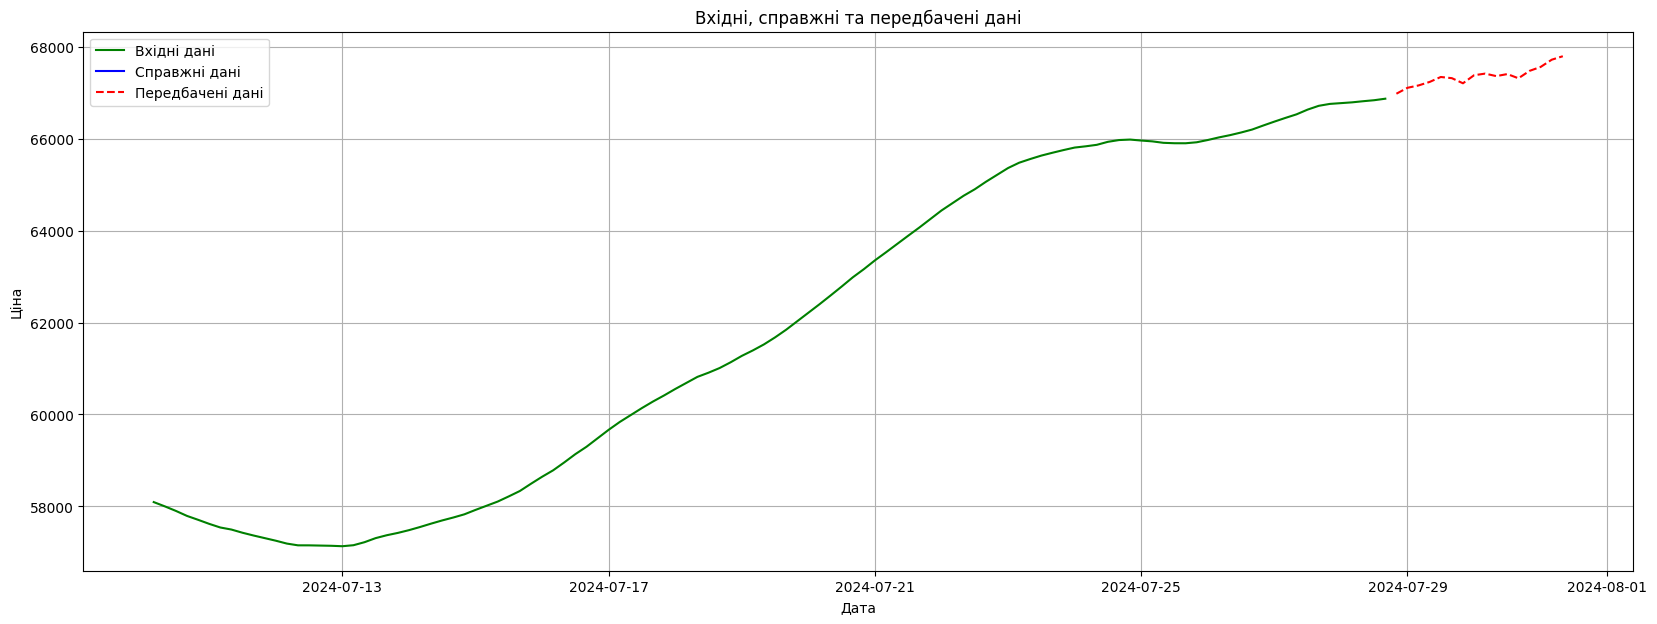

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


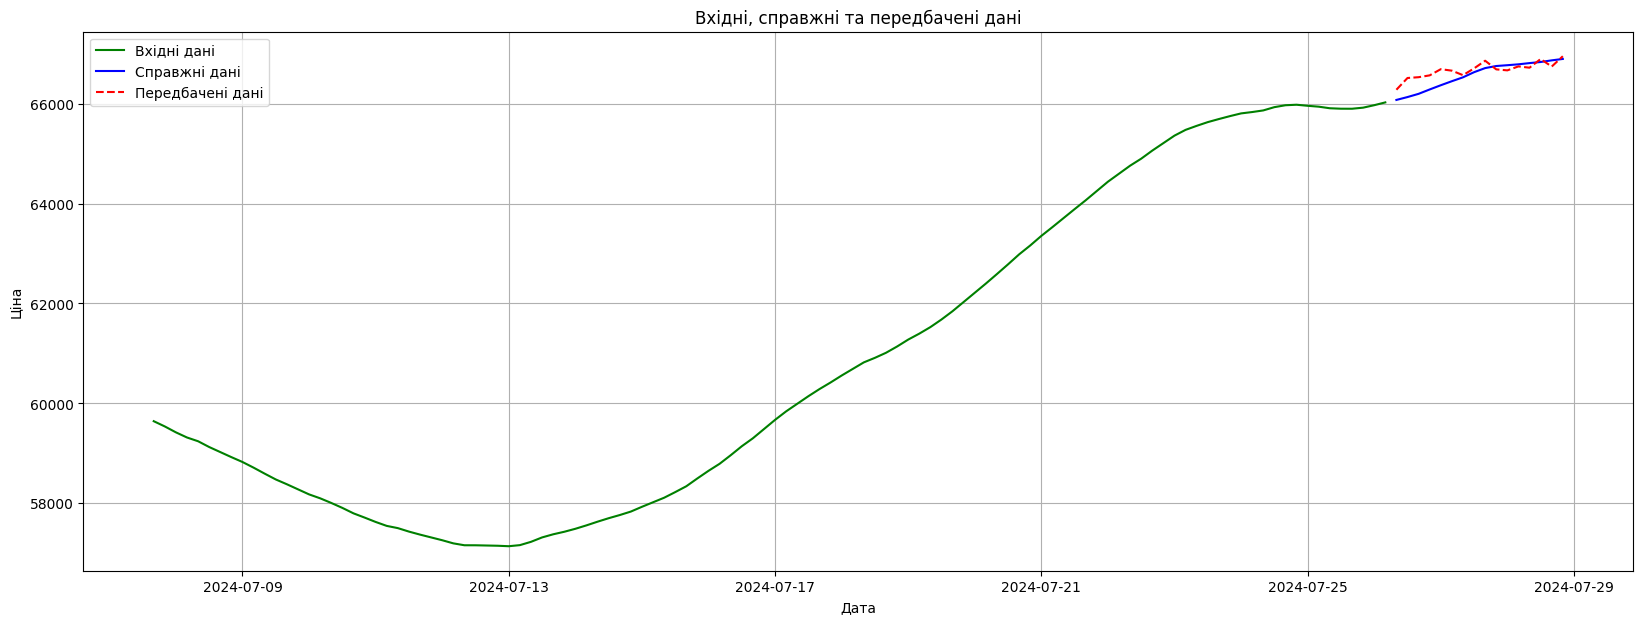

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


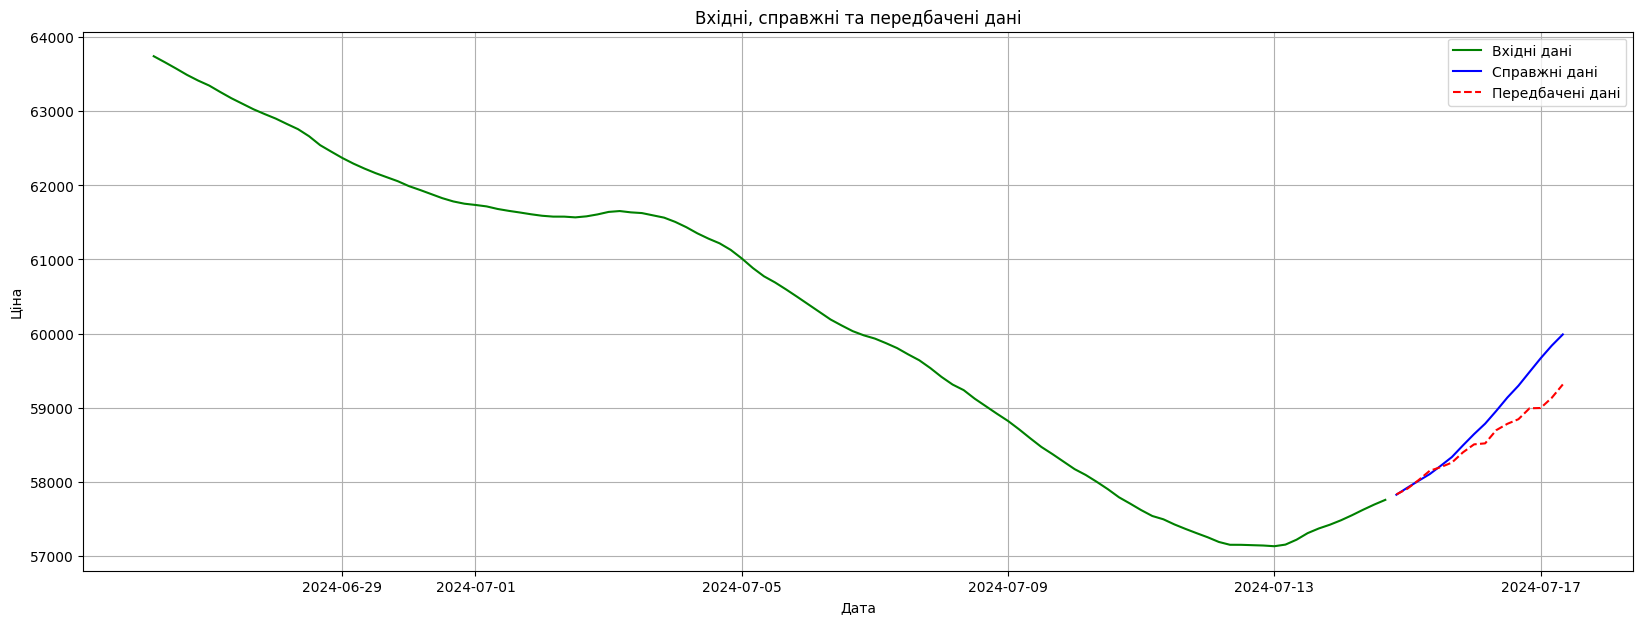

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


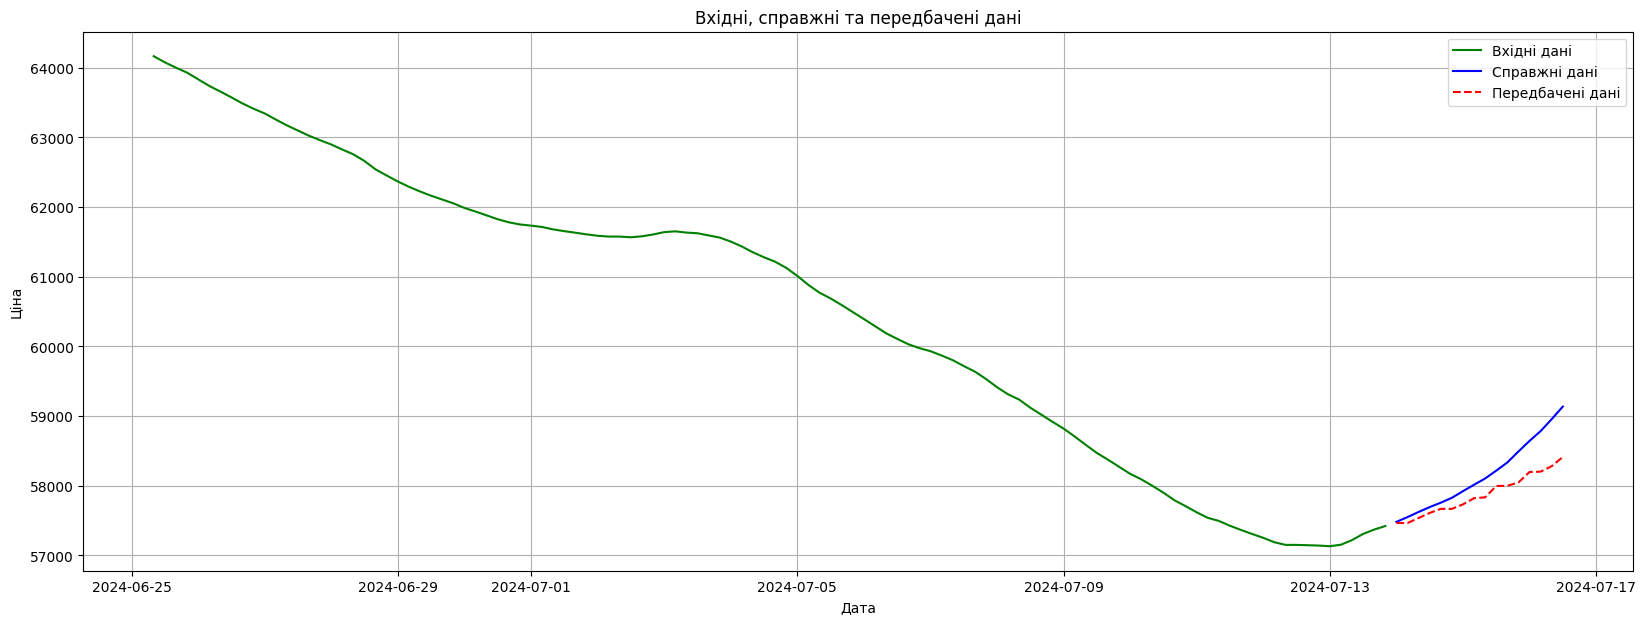

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


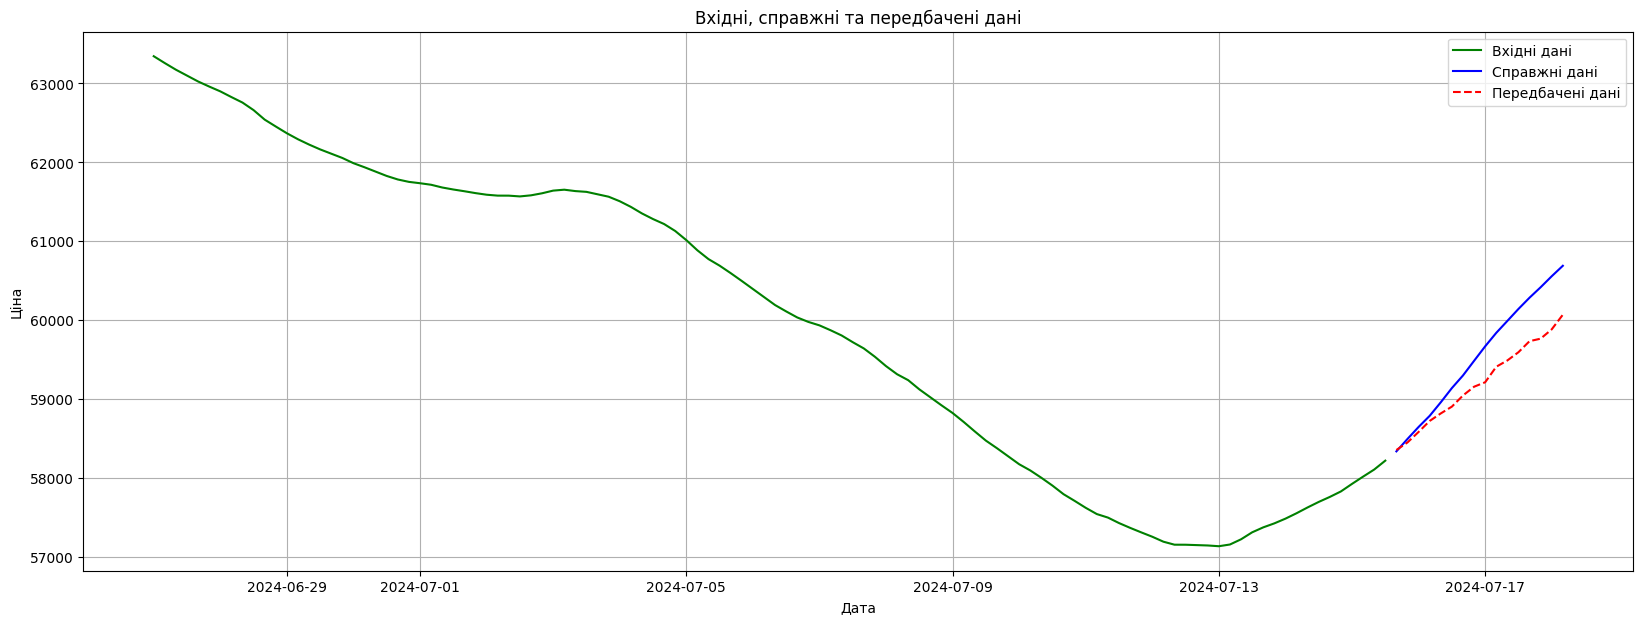

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


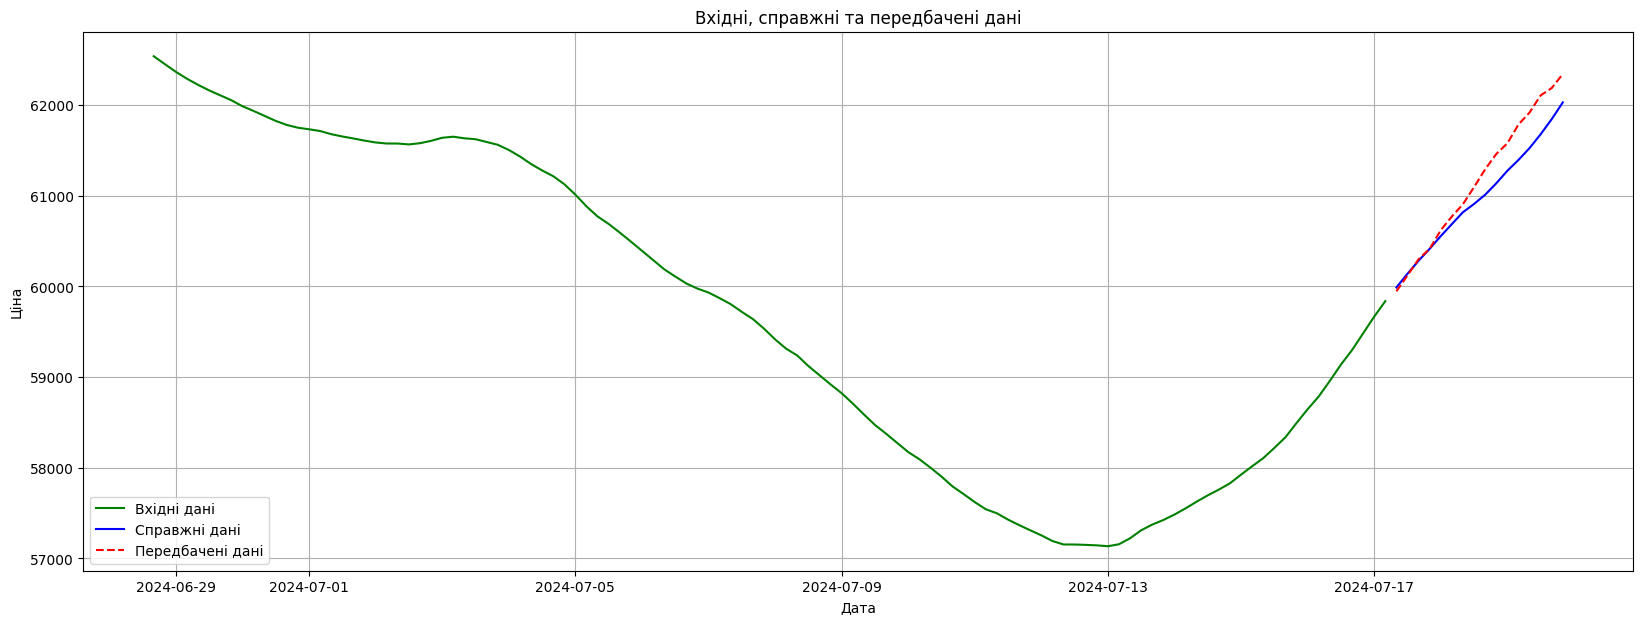

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


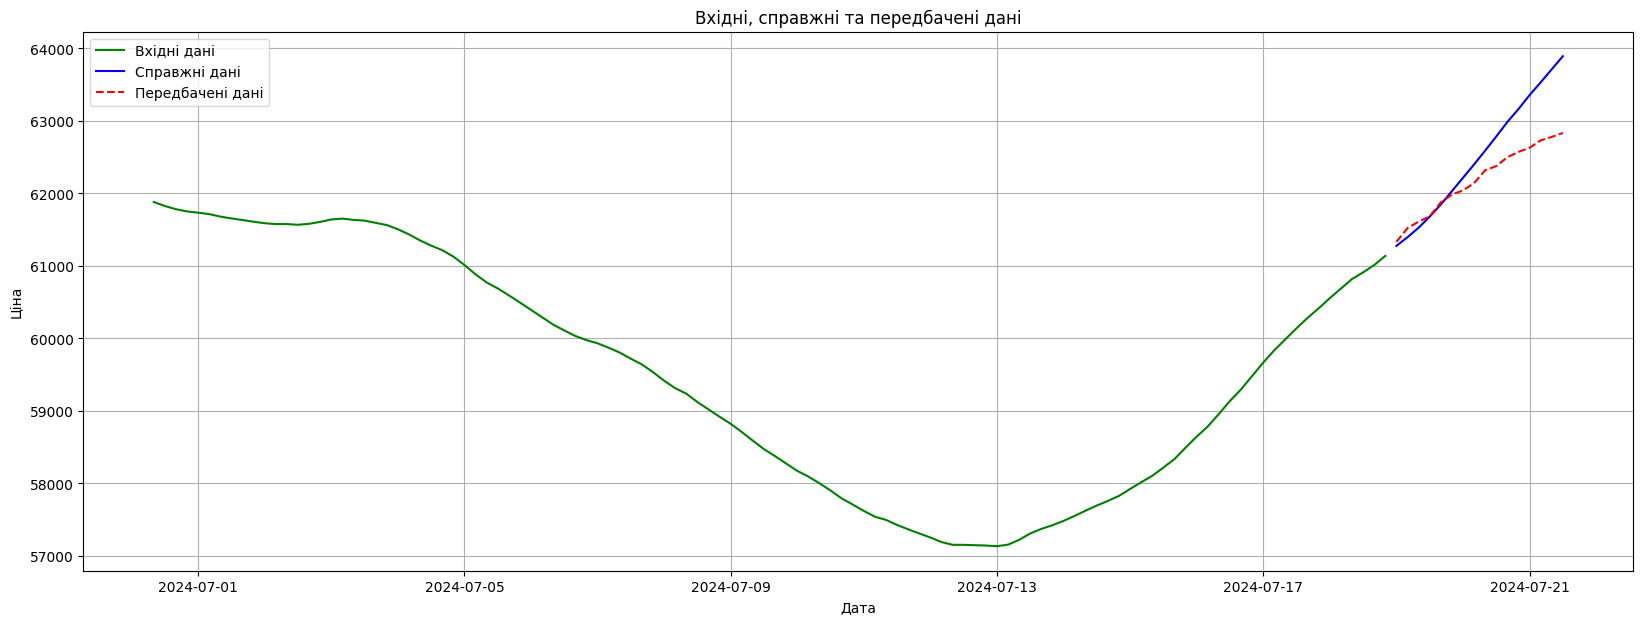

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


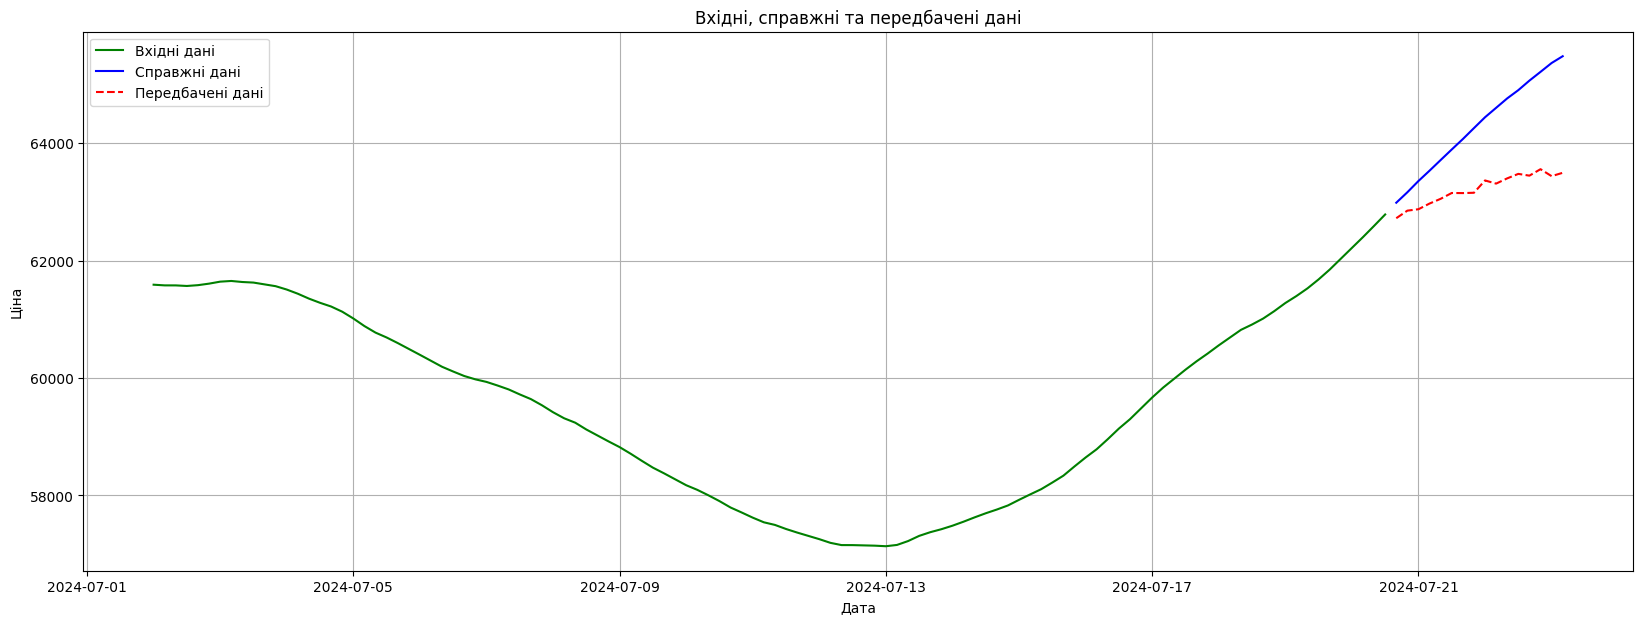

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


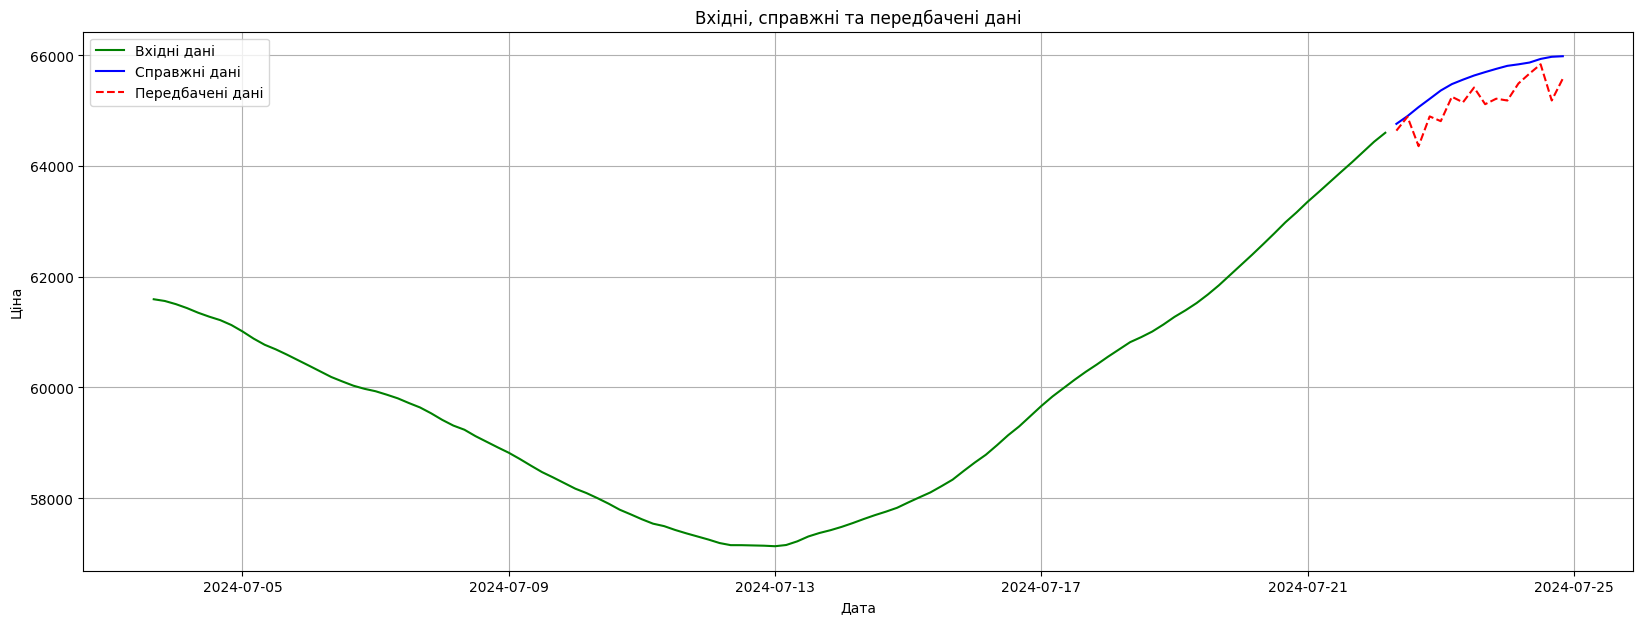

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


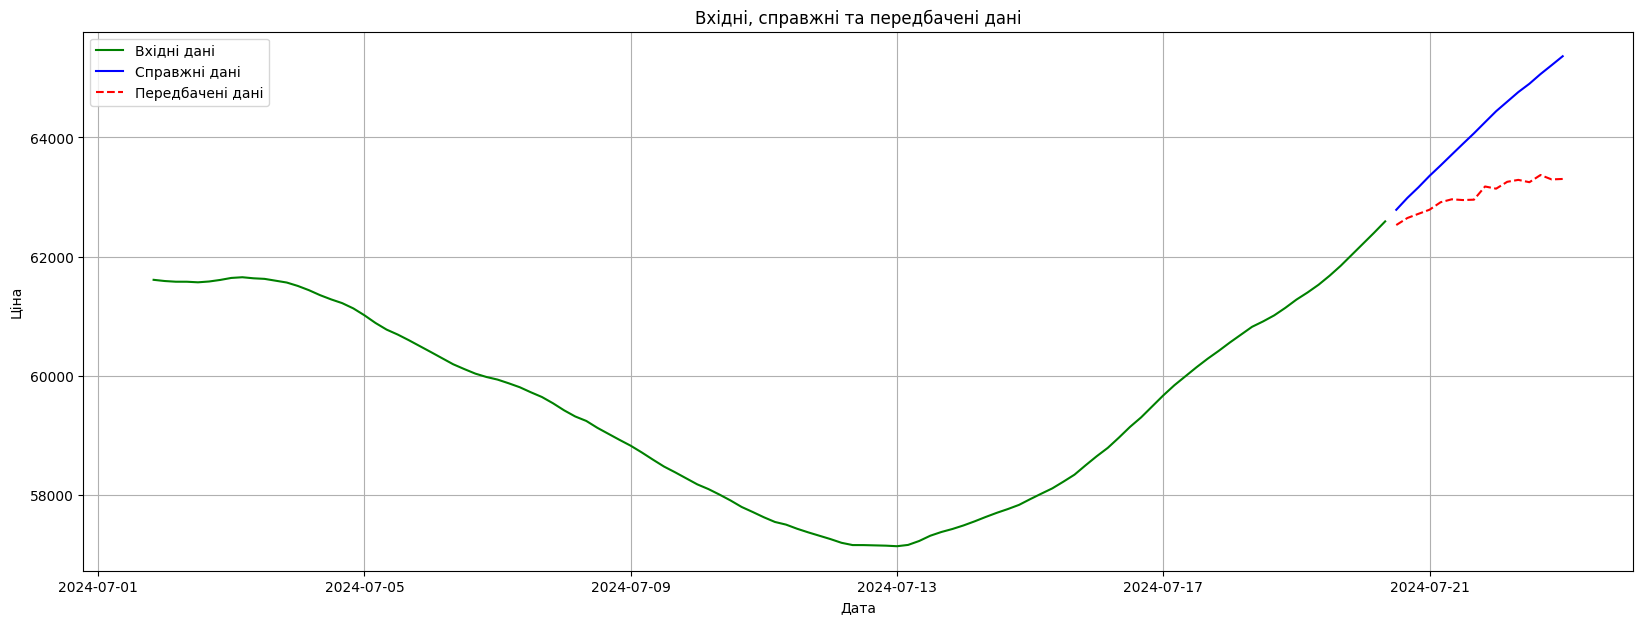

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 4h corresponds to 99.982% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


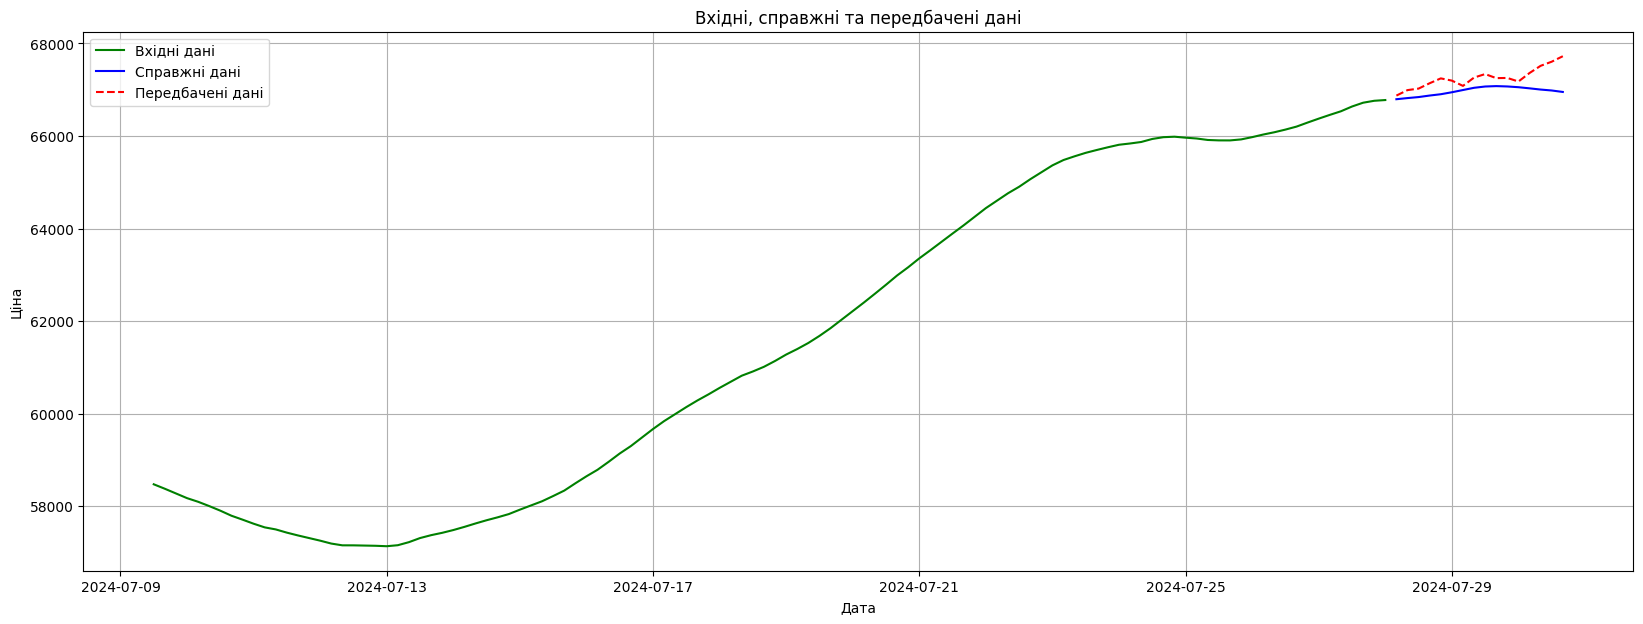

In [45]:
viz(-16)
viz(-31)
viz(-100)
viz(-105)
viz(-95)
viz(-85)
viz(-75)
viz(-65)
viz(-55)
viz(-66)
viz(-20)

In [46]:
from neuralprophet import save
save(m, "SMA50-BTCUSDT-4h.np")